# Prueba de SQL




- Casi todas las preguntas son de alternativas. Tienen que marcar la alternativa correcta para obtener el puntaje. En algunas preguntas les pediré que también me muestren el código de SQL que usaron para contestar. **Si no hay código, pero la alternativa elegida es la correcta, la pregunta será considerada mala. Por último, la query que escriba tiene que dar un resultado único, que le permite seleccionar la alternativa correcta. Si la query muestra más de un resultado su pregunta será considerada mala**.





##### Corra la siguente celda para importar la base y la función para mostrar sus queries de SQL


In [1]:
#libraries
import sqlite3
import pandas as pd
import numpy as np

#reader
def read_df(cur,command):
    result = cur.execute(command)
    col_names = list(map(lambda x: x[0], cur.description))
    df_query = pd.DataFrame(result, columns =col_names)
    print(df_query) 
    
#Base SQL de la tarea

#Establecer la conexión
dbname = 'SQL3_Prueba_1'
conn = sqlite3.connect(dbname + '.sqlite')

cur = conn.cursor()
cur. execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cur.fetchall())

[('detalleboleta',), ('boletas',), ('productos',), ('clientes',)]


##### Pregunta 1

¿En cuál de las siguientes cláusulas de SQL podemos usar AND, NOT LIKE o IS?

-[] SELECT

-[] FROM 

-[X] WHERE 

-[] GROUP BY

##### Pregunta 2

 Las keywords de agreagaciones (AVG,MAX,MIN...) se escribe en la cláusula:

-[X] SELECT

-[] FROM 

-[] WHERE 

-[] GROUP BY

##### Pregunta 3

Es la cláusula que nos permite agrupar resultados por una columna:

-[X] SELECT

-[] FROM 

-[] WHERE 

-[X] GROUP BY

notemos que existen también funciones ventanas que van en el select en particular PARTITION, es una función muy útil y escribí de ella en mi artículo de aprende ingeniería: https://aprendeingenieria.com/creando-valor-con-sql/

##### Pregunta 4

Si queremos solo obtener los primeros resultados de una query usariamos:

-[] SELECT

-[X] LIMIT 

-[] WHERE 

-[] ORDER BY

##### Pregunta 5

Para seleccionar tablas usamos:

-[] SELECT

-[X] FROM 

-[] WHERE 

-[] GROUP BY

##### Pregunta 6

¿Es posible usar aliasing en la clausula FROM?

-[X] SI

-[] NO

En subqueries siempre se crean nombres simple como C u otros con una sola letra.

##### Pregunta 7


SELECT *

FROM tab1

INNER JOIN tab2

_____ tab1.key = tab2.key

¿Cuál es la cláusula que falta?

-[X] ON

-[] USING

-[] WHERE

-[] ORDER BY

##### Pregunta 8


SELECT (4/3)

El resultado de la query anterior ¿Devolverá?

-[] Error

-[] 1.33333

-[X] 1.0

-[] Ninguna de las anterioes

##### Pregunta 9

La keyword o símbolo que usado en SELECT nos permite crear CASOS es:

-[] AS

-[] $

-[] ALL

-[X] CASE

##### Pregunta 10

La keyword ______ no aplica si queremos usarla en la cláusula FROM:

-[] USING

-[] AS

-[X] MIN

-[] ON

##### Pregunta 11

¿La cláusula WHERE nos permite filtrar resultados en un GROUP BY?

-[] VERDADERO

-[X] FALSO

El where se aplica sobre la tabla inicial (seleccionada en el from) y luego se aplica el group by. Ejemplo:

In [13]:
query = """ 
SELECT Idboleta,sum(cantidad)  as cantidad_total
FROM detalleboleta 
WHERE cantidad < 5
GROUP BY Idboleta
ORDER BY cantidad_total desc
LIMIT 20
"""
cur. execute(f"{query};")
print(cur.fetchall())

[(111, 8), (113, 5), (116, 4), (112, 4), (115, 1), (114, 1)]


En este caso notese que hay cantidades mayores que 5, eso es porque esta restricción se aplico primero en la tabla inicial y después se ejecutó group by sobre esta tabla.

##### Pregunta 12

No podemos mezclar más de dos tablas en la clausula FROM

-[X] VERDADERO

-[] FALSO

##### Pregunta 13

Para unir dos tablas en base a una key que está en una columna que lleva el mismo nombre en ambas tablas solo podemos hacerlo usando USING

-[] VERDADERO

-[X] FALSO

Se puede usar join también

##### Pregunta 14

Solo podemos obtener el máximo de una columna usando MAX():

-[] SI

-[X] NO

***HINT: Piense si es posible hacer lo mismo con una combinación de otras keywords***
Ejemplos para conseguir lo mismo de dos formas distintas

In [12]:
query = """ 
SELECT max(cantidad) as max_cantidad
FROM detalleboleta 
"""
cur. execute(f"{query};")
print(cur.fetchall())

[(10,)]


In [11]:
query = """ 
SELECT cantidad as max_cantidad
FROM detalleboleta 
ORDER BY cantidad desc
LIMIT 1
"""
cur. execute(f"{query};")
print(cur.fetchall())

[(10,)]


##### Pregunta 15

Si queremos filtrar registros en base a una key que necesariamente está en la tabla de la izquierda usaríamos una:

-[] FULL JOIN

-[X] LEFT JOIN

-[] INNER JOIN

-[] SELFISH JOIN


##### Pregunta 16

Si hay que filtrar todos los nombres que su segunda letra sea una B podemos usar:

-[] “_ _ _B%”

-[] ´%B_%’

-[X] ‘_B%´

-[] “%B_”

##### Pregunta 17

Podemos escribir queries con letras minúsculas, pero es buena práctica escribir las keywords con mayúsculas

-[X] VERDADERO

-[] FALSO

##### Pregunta 18

Si queremos obtener registros únicos de una columna usamos

-[] UNIQUE

-[] ONLY

-[] LIKE

-[X] DISTINCT

##### Pregunta 19

Si queremos obtener la cantidad de filas de una tabla usaríamos:

-[X] COUNT(*)

-[] MAX(*)

-[] MIN(*)

-[] SELECT(*)


##### Pregunta 20
Si queremos obtener los resultados nulos en la cláusula WHERE usaríamos:

-[X] IS NULL

-[] == NULL

-[] IS NOT NULL

-[] != NULL

##### Pregunta 21
El símbolo de no igual en SQL es:

-[X] <>

-[] LIKE

-[X] !=

-[] ==

##### Pregunta 22
No es posible hacer JOINS usando la misma tabla:

-[] VERDADERO

-[X] FALSO

##### Pregunta 23
No es posible usar subqueries para filtrar resultados de una tabla distinta a la que estamos usando en la clausula FROM:

-[] VERDADERO

-[X] FALSO

##### Pregunta 24
No es posible escribir subqueries en la clausula SELECT:

-[] VERDADERO

-[X] FALSO

##### Pregunta 25
Cuando existen dos columnas con el mismo nombre (imagínese el caso de una JOIN), en el SELECT es necesario especificar la tabla donde obtener la columna repetida por el error de:

-[] No existe error

-[X] AMBIGUEDAD

-[] COMPLETITUD

-[] Ninguna de las anteriores

##### Pregunta 26

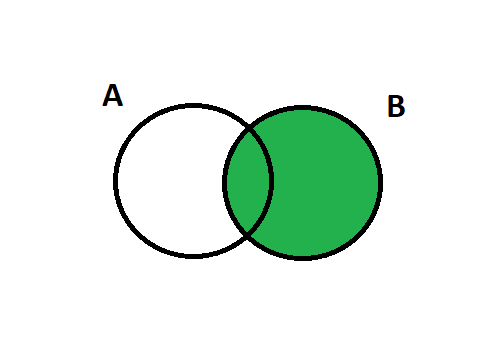

El anterior diagrama de Venn, representa

-[] La unión de A y B

-[X] El conjunto B

-[] El conjunto a A

-[] El conjunto A menos/except el conjunto B


##### Pregunta 27

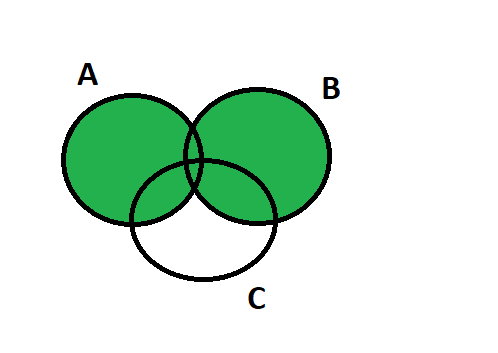
El anterior diagrama de Venn, representa

-[X] La unión de A y B

-[] El conjunto C

-[] La intersección de C con A y B

-[] El conjunto C unión B


##### Pregunta 28

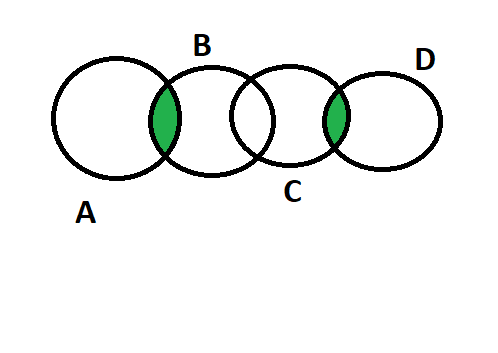
El anterior diagrama de Venn, representa

-[] La unión de A, B, C y D

-[] La intersección de A con C y de B con D

-[] La intersección de A con B, la intersección de B con C, y la intersección de C con D

-[X] La intersección de A con B con la unión de la intersección de C con D

##### Pregunta 29

La diferencia entre una ANTI JOIN y una SEMI JOINS es un NOT en la clausula WHERE:

-[X] VERDADERO

-[] FALSO

##### Pregunta 29

Una CROSS JOIN devolverá todas las combinaciones posibles de la combinación de las tablas consideras en la CROSS JOIN (Ejemplo, una tabla de 10 filas CROSS JOIN una tabla de 15 filas devolverá 150 filas):

-[X] VERDADERO

-[] FALSO

##### Pregunta 30

Un amigo le dice “SQL es un lenguaje muy limitado, no podemos hacer JOINS de data que tiene estructura larga”. Usted lo mira y responde:

-[] VERDADERO, sabes mucho de SQL!

-[X] FALSO, debes revisar la clase I


### Las siguientes 5 preguntas se responden en base al próximo ERD.

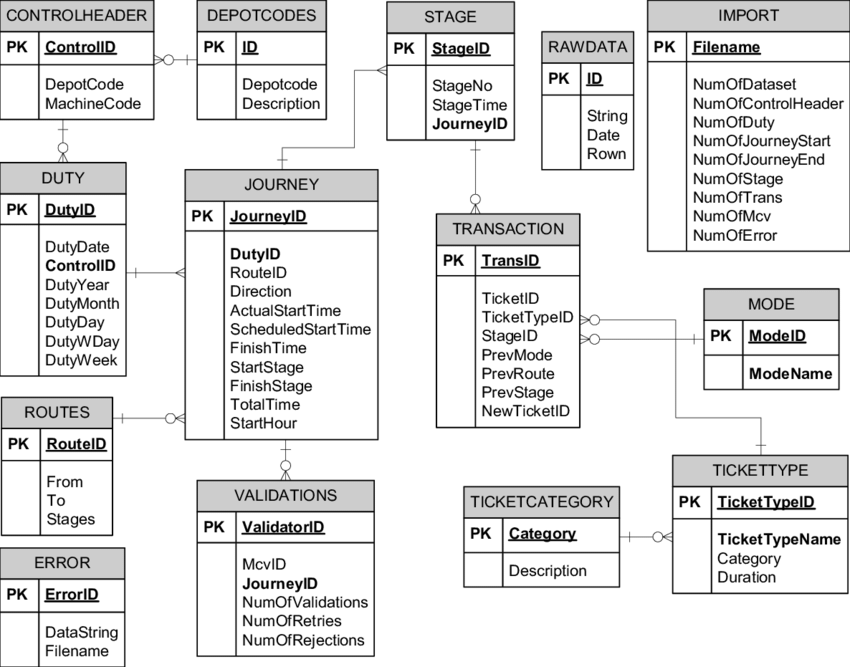

##### Pregunta 31

El ERD no tiene ningún link table:

-[] VERDADERO

-[X] FALSO


##### Pregunta 32

Es imposible identificar el datatype de ninguno de los registros de las instancias que se muestran en el ERD:

-[] VERDADERO

-[X] FALSO

##### Pregunta 33

La forma correcta de leer la relación entre Ticket Category y Ticket Type ID:

-[] Muchos tickets pueden tener muchas categorías

-[] Una categoría solo puede esta asociada a un solo ticket

-[] Un tickets puede tener muchas categorias

-[X] Una categoria puede estar asociada a muchos tickets

##### Pregunta 34

La PRIMARY KEY de la tabla JOURNEY es:

-[] DutyID

-[X] JOURNEYID

-[] Direction

-[] Ninguna de las anteriores

##### Pregunta 35
A.	Hay tablas que no tienen FOREING KEYS 

B.	Hay tablas que tiene más de una FOREING KEY

-[] Solo A es verdadera

-[] Solo B es verdadera

-[X] Ambas son verdaderas

-[] No se lo que es una Foreing Key, pero estoy seguro que no las podemos identificar de ese dibujo.

# Queries, Queries y más Queries

La siguiente sección de la prueba se responde en base a las tablas: boleta, productos, clientes y detalle boleta

Es tarea de usted explorar la relación entre las cuatro tablas, pero es sencilla.

La tabla detalle boletas tiene información de las ventas identificadas por su número de boleta. Cada registro muestra el número de boleta, los productos que iban en esa boleta y la cantidad.

**¿Pregúntese, que estructura tiene la data? ¿Puedo comprar productos distintos en cada boleta?**

La tabla productos muestra información de los productos que usted vende y clientes cuáles son sus clientes. Mientras que boleta relaciona boleta con cliente.

**Tendrá que responder la siguiente 40 preguntas en base a su entendimiento de este database**

*HINT*: 
- Cuando se le pregunte valores de boletas o clientes, tendrá que multiplicar la cantidad de producto vendido por su precio y luego hacer la agregación correspondiente

- Puede unir la tabla clientes y boletas con el identificador de cliente y la tabla productos con detalle boletas usando el id de id de productos

**Recuerde que  tiene que mostrar la query que uso para responder, y esta tiene que dar el resultado preciso y único de la alternativa que seleccionó (una fila)**

##### Pregunta 36
¿Cuántas boletas hay en sus registros (revise boletas)?

-[] 1

-[] 5

-[X] 6

-[] 10


In [17]:
query = """ 
SELECT count(*) as count
FROM boletas 
"""
cur. execute(f"{query};")

read_df(cur,query)

   count
0      6


##### Pregunta 37
¿Cuántos clientes tiene?

-[] 1

-[X] 3

-[] 2

-[] 4

In [18]:
query = """ 
SELECT COUNT(DISTINCT (Idcliente)) AS CLIENTES_UNICOS
FROM clientes 
"""
cur. execute(f"{query};")

read_df(cur,query)

   CLIENTES_UNICOS
0                3


##### Pregunta 38
¿Cuántos productos tiene?

-[] 1

-[] 4

-[] 6

-[X] 7

In [19]:
query = """ 
SELECT COUNT(DISTINCT (Idproducto)) AS productos_unicos
FROM productos 
"""
cur. execute(f"{query};")

read_df(cur,query)

   productos_unicos
0                 7


##### Pregunta 39
¿Cuál es el precio promedio de sus productos?

-[] 111

-[X] 121

-[] 123

-[] 130

In [24]:
query = """ 
SELECT AVG("Precio unitario") avg_price
FROM productos 
"""
cur. execute(f"{query};")

read_df(cur,query)

    avg_price
0  121.428571


##### Pregunta 40
¿Cuál es el precio promedio de sus productos de la categoría "Galletas"?

-[] 53

-[X] 63

-[] 83

-[] 20

In [23]:
query = """ 
SELECT Categoría,AVG("Precio unitario")
FROM productos 
WHERE Categoría='Galletas' 
GROUP BY Categoría
"""
cur. execute(f"{query};")

read_df(cur,query)

  Categoría  AVG("Precio unitario")
0  Galletas               63.333333


##### Pregunta 41
¿Cuantos veces (boletas) compró el cliente "A" (use la tabla boletas)?

-[X] 3

-[] 2

-[] 1

-[] 4

In [25]:
read_df(cur,"""SELECT count(*) as boletas_cliente_A
FROM boletas 
WHERE Idcliente='A' ;""")

   boletas_cliente_A
0                  3


##### Pregunta 42
¿Cómo se llama su cliente de Idcliente A (use la tabla clientes)?

-[] Álvaro

-[X] Simón

-[] Fede

-[] Cami

In [27]:
read_df(cur,"""SELECT Nombre
FROM clientes 
WHERE Idcliente='A';""")

  Nombre
0  Simon


##### Pregunta 43
¿Cuanto es el máximo de la columna Cantidad de la tabla detalleboleta?

-[X] 10

-[] 6

-[] 5

-[] 2

In [29]:
read_df(cur,"""SELECT MAX(Cantidad)
FROM detalleboleta 
 ;""")

   MAX(Cantidad)
0             10


##### Pregunta 44
¿Cuál es el Idboleta de boleta con el Máximo de Cantidad?

-[] 111

-[X] 112

-[] 113

-[] 116

In [30]:
read_df(cur,"""select Idboleta FROM detalleboleta
WHERE Cantidad in (
SELECT MAX(Cantidad)
FROM detalleboleta 
) ;""")

   Idboleta
0       112


##### Pregunta 45
¿Cuanto es el mínimo de la columna Cantidad de la tabla detalleboleta?

-[X] 1

-[] 2

-[] 3

-[] 4

In [31]:
read_df(cur,"""SELECT MIN(Cantidad)
FROM detalleboleta  ;""")

   MIN(Cantidad)
0              1


##### Pregunta 46
¿Cuál es la IdCliente de quien compró la boleta de la respuesta de la pregunta 44 (use la tabla boletas)?

-[] A

-[X] B

-[] C

-[] D

In [32]:
read_df(cur,"""SELECT Idcliente FROM 
boletas
WHERE Idboleta in
(
select Idboleta FROM detalleboleta
WHERE Cantidad in 
(
SELECT MAX(Cantidad)
FROM detalleboleta 
)
);""")

  Idcliente
0        B 


##### Pregunta 47
¿Cómo se llama su cliente con la Idcliente de la pregunta anterior (use la tabla clientes)?

-[] Álvaro

-[] Simón

-[] Fede

-[X] Cami

Esto estuve difícil debido a unos espacios en Idcliente en la tabla boletas

In [35]:
read_df(cur,"""
SELECT Nombre
FROM clientes
WHERE CAST(Idcliente AS VARCHAR(10)) IN
( 
SELECT REPLACE(Idcliente, ' ', '') FROM 
boletas
WHERE Idboleta in
(
select Idboleta 
FROM detalleboleta
WHERE Cantidad in 
(
SELECT MAX(Cantidad)
FROM detalleboleta 
)
)
)

""")

  Nombre
0   Cami


##### Pregunta 48
¿Cuantos productos se llaman Coke algo..(use la tabla productos)?

-[X] 3

-[] 2

-[] 1

-[] 0

In [36]:
read_df(cur,"""SELECT COUNT (DISTINCT(Descripción))
FROM productos
WHERE Descripción LIKE '%Coke%';""")

   COUNT (DISTINCT(Descripción))
0                              3


##### Pregunta 49
¿Cuanto es el promedio precio unitario de los productos NOT Coke?

-[] 200

-[] 100

-[X] 50

-[] 10

In [37]:
read_df(cur,"""SELECT AVG("Precio unitario")
FROM productos
WHERE Descripción NOT IN (
SELECT DISTINCT(Descripción)
FROM productos
WHERE Descripción LIKE '%Coke%'
)""")

   AVG("Precio unitario")
0                    50.0


##### Pregunta 50
¿Cuál es el precio Máximo de los productos Coke?

-[] 100

-[] 150

-[] 200

-[X] 300

In [38]:
read_df(cur,"""SELECT MAX("Precio unitario")
FROM productos
WHERE Descripción IN (
SELECT DISTINCT(Descripción)
FROM productos
WHERE Descripción LIKE '%Coke%'
) ;""")

   MAX("Precio unitario")
0                     300


##### Pregunta 51
¿Cuanta es la cantidad de productos que se vendieron el la boleta 111?

-[] 10

-[] 15

-[X] 19

-[] 20

In [39]:
read_df(cur,"""SELECT SUM(Cantidad)
FROM detalleboleta
WHERE Idboleta=111""")

   SUM(Cantidad)
0             19


##### Pregunta 52
¿Cuanta es la cantidad de productos que se vendieron en la boleta 112?

-[] 10

-[X] 14

-[] 20

-[] 21

In [40]:
read_df(cur,"""SELECT SUM(Cantidad)
FROM detalleboleta
WHERE Idboleta=112""")

   SUM(Cantidad)
0             14


##### Pregunta 53
¿Cuanto ingreso le generó la venta del producto 1 en la boleta 111 (tiene que empezar a usar JOINS y recordar que puede multiplicar columnas)?

-[] 20

-[] 50

-[] 100

-[X] 200

In [41]:
read_df(cur,"""SELECT  "Precio Unitario"*Cantidad AS ingreso
FROM productos
JOIN detalleboleta using(Idproducto)
WHERE Idproducto=1 AND Idboleta=111
ORDER BY Idboleta;""")


   ingreso
0      200


##### Pregunta 54
¿Cuanto ha vendido del producto Aqua (en cantidades) en todas sus boletas?

-[] 10

-[] 6

-[X] 5

-[] 2

In [43]:
read_df(cur,"""SELECT  SUM(Cantidad)
FROM productos
JOIN detalleboleta using(Idproducto)
WHERE Descripción='Aqua'
ORDER BY Idboleta
;""")

   SUM(Cantidad)
0              5


##### Pregunta 55
¿Cuanto ingreso le generó la boleta 111?

-[] 1700

-[X] 1960

-[] 2000

-[] 2100

In [45]:
read_df(cur,"""SELECT SUM(ingreso)
FROM
(
SELECT "Precio Unitario"*Cantidad AS ingreso
FROM productos
JOIN detalleboleta using(Idproducto)
WHERE Idboleta=111
ORDER BY Idboleta
) AS a ;""")

   SUM(ingreso)
0          1960


##### Pregunta 56
¿Cuál boleta le generó sus mayores ingresos (ORDER BY y LIMIT le serán útiles)?

-[] 111

-[] 112

-[X] 113

-[] 114

In [47]:
read_df(cur,"""
SELECT Idboleta
FROM 
(
SELECT Idboleta,SUM(ingreso) AS ingreso_boleta
FROM
(
SELECT Idboleta,"Precio Unitario"*Cantidad AS ingreso
FROM productos
JOIN detalleboleta using(Idproducto)
ORDER BY Idboleta
) AS a
GROUP BY Idboleta
ORDER BY ingreso_boleta DESC
LIMIT 1
)AS B;""")

   Idboleta
0       113


##### Pregunta 57
¿Quién es su mejor cliente o el que le genera los mayores ingresos (Tendrá que hacer varias JOINS)?

-[] Álvaro

-[] Simón

-[X] Fede

-[] Cami

In [48]:
read_df(cur,"""
SELECT Nombre
FROM clientes
WHERE Idcliente IN 
(
SELECT Idcliente
FROM 
(
SELECT Idcliente,SUM (ingreso) AS ingreso_cliente
FROM
(
SELECT *,"Precio Unitario"*Cantidad AS ingreso
FROM  detalleboleta 
JOIN productos using(Idproducto)
JOIN ( 
SELECT  Idboleta ,REPLACE(Idcliente, ' ', '') AS Idcliente 
FROM
boletas
) using(Idboleta)
JOIN (
SELECT  REPLACE(Idcliente, ' ', '') AS Idcliente, Nombre 
FROM clientes
) 
using(Idcliente)
) AS a
GROUP BY Idcliente
ORDER BY ingreso_cliente DESC
LIMIT 1
) 
)
;""")

  Nombre
0   Fede


##### Pregunta 58
¿Cuanto le ha comprado (ingreso) Simon?

-[] 1500

-[] 2000

-[] 3025

-[X] 2270

In [50]:
read_df(cur,"""
SELECT ingreso_cliente
FROM clientes
JOIN
(
SELECT Idcliente,SUM (ingreso) AS ingreso_cliente
FROM
(
SELECT *,"Precio Unitario"*Cantidad AS ingreso
FROM  detalleboleta 
JOIN productos using(Idproducto)
JOIN ( 
SELECT  Idboleta ,REPLACE(Idcliente, ' ', '') AS Idcliente 
FROM
boletas
) using(Idboleta)
JOIN (
SELECT  REPLACE(Idcliente, ' ', '') AS Idcliente, Nombre 
FROM clientes
) 
using(Idcliente)
) AS a
GROUP BY Idcliente
ORDER BY ingreso_cliente DESC
) AS b USING(Idcliente)
WHERE Nombre = 'Simon'

 ;""")

   ingreso_cliente
0             2270


##### Pregunta 59
¿Cuanto ingreso le ha generado el producto Coke Sugary?

-[] 2800

-[] 3000

-[X] 3200

-[] 4000

In [52]:
read_df(cur,"""SELECT ingreso_prod
FROM
(
SELECT Idproducto,SUM (ingreso) AS ingreso_prod
FROM
(
SELECT *,"Precio Unitario"*Cantidad AS ingreso
FROM  detalleboleta 
JOIN productos using(Idproducto)
JOIN ( 
SELECT  Idboleta ,REPLACE(Idcliente, ' ', '') AS Idcliente 
FROM
boletas
) using(Idboleta)
JOIN (
SELECT  REPLACE(Idcliente, ' ', '') AS Idcliente, Nombre 
FROM clientes
) 
using(Idcliente)
) AS a
WHERE Descripción='Coke Sugary'
GROUP BY Idproducto
ORDER BY ingreso_prod DESC
) as a
;""")

   ingreso_prod
0          3200


##### Pregunta 60
¿Cuanto ingreso le generaron los productos NOT Coke?

-[X] 1370

-[] 5000

-[] 4000

-[] 1380

In [53]:
read_df(cur,"""SELECT SUM(ingreso_prod)
FROM
(
SELECT Idproducto,SUM (ingreso) AS ingreso_prod
FROM
(
SELECT *,"Precio Unitario"*Cantidad AS ingreso
FROM  detalleboleta 
JOIN productos using(Idproducto)
JOIN ( 
SELECT  Idboleta ,REPLACE(Idcliente, ' ', '') AS Idcliente 
FROM
boletas
) using(Idboleta)
JOIN (
SELECT  REPLACE(Idcliente, ' ', '') AS Idcliente, Nombre 
FROM clientes
) 
using(Idcliente)
) AS a
WHERE Descripción not like '%Coke%'
GROUP BY Idproducto
ORDER BY ingreso_prod DESC
) as a;""")

   SUM(ingreso_prod)
0               1370


# Desde aquí solo puede responder usando Subqueries

##### Pregunta 61
¿Cuál es el Idboleta de boleta con el Máximo de Cantidad?

-[] 111

-[X] 112

-[] 113

-[] 116

In [54]:
read_df(cur,"""SELECT Idboleta
FROM detalleboleta
WHERE Cantidad IN 
(
SELECT MAX(CANTIDAD)
FROM detalleboleta
);""")

   Idboleta
0       112


##### Pregunta 62
¿Cuál boleta le generó sus mayores ingresos ?

-[] 111

-[] 112

-[x] 113

-[] 114

In [55]:
read_df(cur,"""SELECT Idboleta,max(ingreso_boleta)
FROM
(
SELECT Idboleta,sum(ingreso) ingreso_boleta
FROM
(
SELECT Idboleta,"Precio Unitario"*Cantidad AS ingreso
FROM  detalleboleta 
JOIN productos USING (Idproducto)
)AS a
GROUP BY Idboleta
) ;""")

   Idboleta  max(ingreso_boleta)
0       113                 3030


##### Pregunta 63
¿Cuál es el producto Coke con el mayor precio?

-[] Coke Zero

-[] Coke Sugary

-[X] Coke Light

-[] Aqua

In [56]:
read_df(cur,"""SELECT Descripción,max("Precio Unitario")
FROM productos
WHERE Descripción IN
(
SELECT Descripción
FROM productos
WHERE Descripción LIKE '%Coke%' 
);""")

# en esta NO es necesario subquery :/ Así que sobrecomplique la query solo para seguir instrucciones de arriba

  Descripción  max("Precio Unitario")
0  Coke Light                     300


##### Pregunta 64
¿Cuál es el producto NOT Coke con el menor precio?

-[X] Aqua

-[] Cookies Choc

-[] Cookies Val

-[] Cookies Deli

In [58]:
read_df(cur,"""SELECT Descripción,min("Precio Unitario")
FROM productos
WHERE Descripción IN
(
SELECT Descripción
FROM productos
WHERE Descripción not LIKE '%Coke%' 
)
""")

  Descripción  min("Precio Unitario")
0        Aqua                      10


##### Pregunta 65
¿Cuanto ingreso le ha generado el producto Coke Sugary?

-[] 2800

-[] 3000

-[X] 3200

-[] 4000

In [60]:
read_df(cur,"""SELECT SUM(ingreso) as Ingreso_coke_sugary
FROM 
(
SELECT *,"Precio Unitario"*Cantidad AS ingreso
FROM  detalleboleta 
JOIN productos USING (Idproducto)
WHERE Descripción = 'Coke Sugary'
)AS a;""")

   Ingreso_coke_sugary
0                 3200


##### Pregunta 66
¿Cuantas boletas vendieron una cantidad menor al promedio?

-[] 1

-[] 2

-[X] 3

-[] 4

In [62]:
read_df(cur,"""
SELECT count(*)
FROM
(
SELECT Idboleta,sum(Cantidad) cantidad_x_boleta
FROM
detalleboleta
GROUP BY Idboleta
)
WHERE cantidad_x_boleta <
(
SELECT avg(cantidad_x_boleta)
FROM
(
SELECT Idboleta,sum(Cantidad) cantidad_x_boleta
FROM detalleboleta
GROUP BY Idboleta
)

) ;""")

   count(*)
0         3


##### Pregunta 67
¿Cuantos productos vendieron en alguna boleta una cantidad igual aa 1?

-[X] 9

-[] 10

-[] 11

-[] 12

In [64]:
read_df(cur,"""SELECT count(*)
FROM
(
SELECT Idboleta,Idproducto,sum(Cantidad) as  cantidad_x_producto_x_boleta
FROM detalleboleta
GROUP BY Idboleta,Idproducto
)
WHERE cantidad_x_producto_x_boleta=1;""")

   count(*)
0         9


##### Pregunta 68

¿Cuantas boletas vendieron productos con una cantidad igual a 1?

-[] 4

-[X] 5

-[] 9

-[] 10

In [66]:
read_df(cur,"""SELECT count(DISTINCT(Idboleta))
FROM
(
SELECT Idboleta,Idproducto,sum(Cantidad) as  cantidad_x_producto_x_boleta
FROM detalleboleta
GROUP BY Idboleta,Idproducto
)
WHERE cantidad_x_producto_x_boleta=1 ;""")

   count(DISTINCT(Idboleta))
0                          5


##### Pregunta 69
¿Cuál boleta le generó sus menores ingresos ?

-[] 111

-[] 112

-[] 113

-[X] 115

In [67]:
read_df(cur,"""SELECT Idboleta, min(ingreso_x_boleta)
FROM 
(
SELECT Idboleta, sum(ingreso) ingreso_x_boleta
FROM
(
SELECT *,"Precio Unitario"*Cantidad AS ingreso
FROM  detalleboleta 
JOIN productos USING (Idproducto)
) AS a
GROUP BY Idboleta
);""")

   Idboleta  min(ingreso_x_boleta)
0       115                     40


##### Pregunta 70
¿Cuanto es el producto que le generó los mayores ingresos?

-[X] Coke Sugary

-[] Cookies Val

-[] Aqua

-[] Coke Light

In [69]:
read_df(cur,"""SELECT Descripción 
FROM productos
JOIN 
(
SELECT Idproducto,max(ingreso_producto)
FROM
(
SELECT Idproducto,sum(ingreso) ingreso_producto
FROM 
(
SELECT *,"Precio Unitario"*Cantidad AS ingreso
FROM  detalleboleta 
JOIN productos USING (Idproducto)
)
GROUP BY Idproducto
)
) USING (Idproducto)
 ;""")

   Descripción
0  Coke Sugary
